## Decision Tree

In [12]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()

# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target  # Add target column

# Display the DataFrame
print(iris_df.head())
print(iris_df.info())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
import graphviz
from sklearn import tree

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

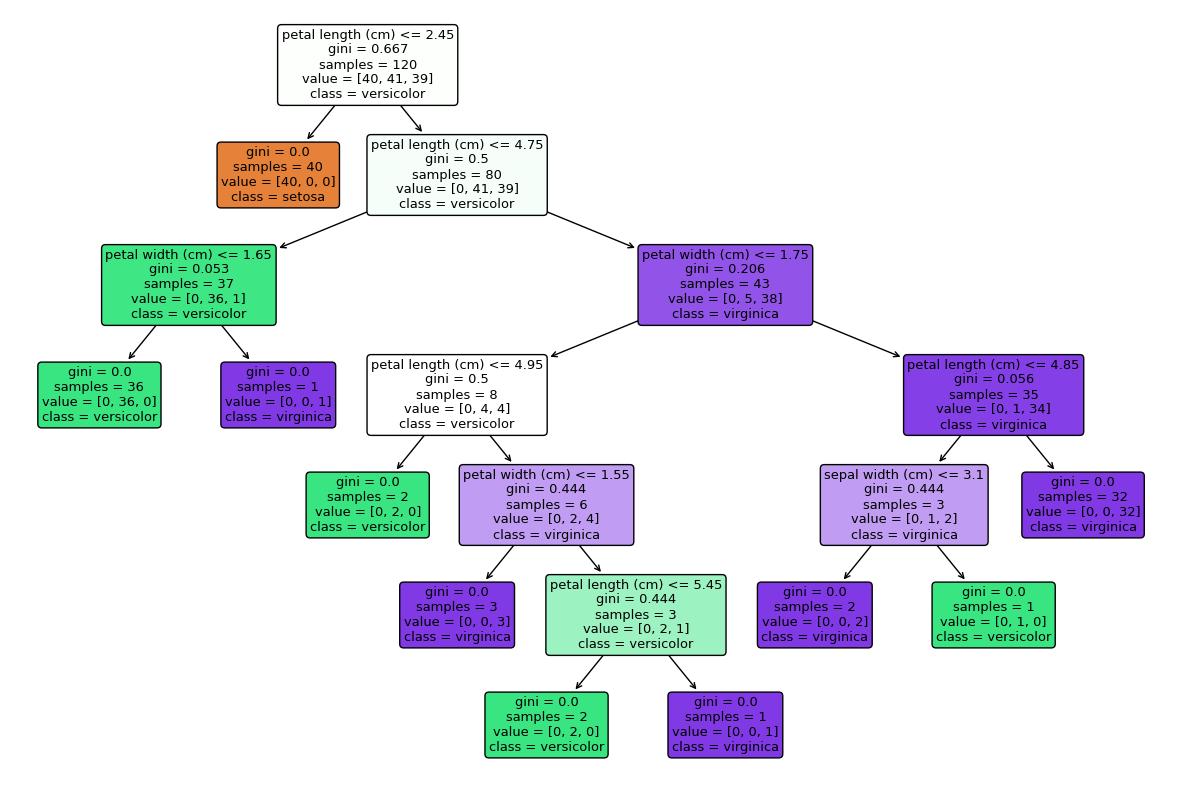

In [8]:
# Visualize the Decision Tree structure as an image
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

In [14]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(acc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [16]:
df = pd.read_csv('./penguins.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [20]:
# 범주형 자료 처리 species  island   sex df1_fill
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_species = label_encoder.fit_transform(df['species'])
# df1_drop.loc[df1_drop['species'], 'species'] = encoded_species
df['species'] = encoded_species
df.head()

df.loc[df['sex'] == 'MALE', 'sex'] = 0
df.loc[df['sex'] == 'FEMALE', 'sex'] = 1
df.head()


label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df['island'])
df['island'] = encoded_target
df.head()

df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,0


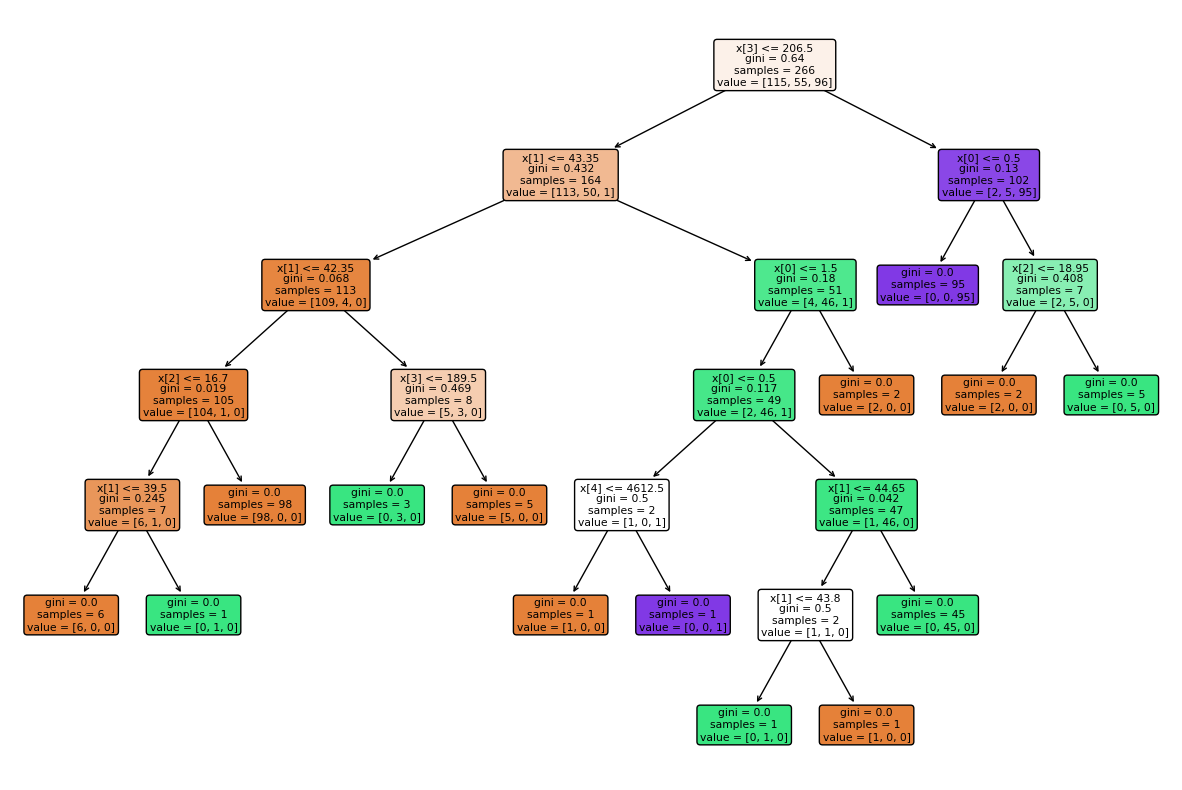

In [24]:
# import pandas as pd
# from sklearn.datasets import load_iris

# # Load iris dataset
# iris = load_iris()

# # Create a Pandas DataFrame
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# iris_df['target'] = iris.target  # Add target column

# # Display the DataFrame
# print(iris_df.head())
# print(iris_df.info())


# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
import graphviz
from sklearn import tree

# Load iris dataset
X = df.drop('species',axis = 1)
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)


# Visualize the Decision Tree structure as an image
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, rounded=True)
plt.show()


## 회귀분석

## 앙상블

In [39]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score



In [26]:
# 모델생성
# 로지스틱 회귀 모델을 만들고 KNN모델을 만들고 두 모델로 보팅 모델
# estimators는 리스트 안에 꼭 튜플 형식으로 집어넣어 줘야 한다. voting 방식은 하드가 아니라 소프트로 지정해준다. 기본값은 하드
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

lr_clf = LogisticRegression(solver="liblinear")
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")


In [27]:
# 반복하여 정확도를 보면 각각의 알고리즘일 때 보다 보팅 형식으로 묶어 사용했을 때 정확도 상승

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=999)

classifiers = [vo_clf, lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    name = classifier.__class__.__name__
    print(f"{name} 정확도 : {accuracy_score(y_test, pred)}")


VotingClassifier 정확도 : 0.9385964912280702
LogisticRegression 정확도 : 0.9210526315789473
KNeighborsClassifier 정확도 : 0.9122807017543859


In [28]:
df = pd.read_csv('./Boston_house.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# normalize scaler
from sklearn.preprocessing import MinMaxScaler


In [31]:
x_data = df.drop('Target',axis=1)
y_data = df.Target

In [35]:
lr_clf = LinearRegression()
knn_clf = KNeighborsRegressor(n_neighbors=8)
vo_clf = VotingRegressor(estimators=[("LR", lr_clf), ("KNN", knn_clf)])

In [37]:
# 반복하여 정확도를 보면 각각의 알고리즘일 때 보다 보팅 형식으로 묶어 사용했을 때 정확도 상승

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=999)

classifiers = [vo_clf, lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    name = classifier.__class__.__name__
    print(f"{name} MSE : {mean_squared_error(y_test, pred)}")


VotingRegressor MSE : 21.0571602553784
LinearRegression MSE : 19.046890870178288
KNeighborsRegressor MSE : 36.73949142156863


## GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

params = {'n_estimators': [100], 'max_depth': [6, 8, 10, 12], 'min_samples_leaf': [8, 12, 18],
          'min_samples_split': [8, 16, 20]}

clf = RandomForestClassifier(n_estimators=100)
grid_clf = GridSearchCV(clf, param_grid=params, cv=2, n_jobs=-1)  # -1 은 cpu를 다 쓴다는 의미
grid_clf.fit(X_train, y_train)

print(f"최적의 파라미터\n{grid_clf.best_params_}")
print(f"최고 예측 정확도: {grid_clf.best_score_}")

최적의 파라미터
{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.9507042253521126


In [42]:
# 반복하여 정확도를 보면 각각의 알고리즘일 때 보다 보팅 형식으로 묶어 사용했을 때 정확도 상승

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=999)


params = {'n_estimators': [100,150,200], 'max_depth': [6, 8, 10, 12,15,19], 'min_samples_leaf': [8, 12, 18],
          'min_samples_split': [8, 16, 20]}

clf = RandomForestRegressor(n_estimators=100)
grid_clf = GridSearchCV(clf, param_grid=params, cv=2, n_jobs=-1)  # -1 은 cpu를 다 쓴다는 의미
grid_clf.fit(X_train, y_train)

print(f"최적의 파라미터\n{grid_clf.best_params_}")
print(f"최고 예측 정확도: {grid_clf.best_score_}")

최적의 파라미터
{'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7969417874034671


In [45]:
# 반복하여 정확도를 보면 각각의 알고리즘일 때 보다 보팅 형식으로 묶어 사용했을 때 정확도 상승

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=999)
scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

params = {'n_estimators': [100, 50], 'max_depth': [15,19,24,30,50], 'min_samples_leaf': [8, 12, 18],
          'min_samples_split': [8, 16, 20]}

clf = RandomForestRegressor(n_estimators=100)
grid_clf = GridSearchCV(clf, param_grid=params, cv=2, n_jobs=-1)  # -1 은 cpu를 다 쓴다는 의미
grid_clf.fit(X_train, y_train)

print(f"최적의 파라미터\n{grid_clf.best_params_}")
print(f"최고 예측 정확도: {grid_clf.best_score_}")

최적의 파라미터
{'max_depth': 24, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 50}
최고 예측 정확도: 0.7953892229987454
